In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

from sklearn.metrics import mean_absolute_percentage_error



In [71]:
df = pd.read_csv("datasets/AirPassengers.csv")

In [72]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [73]:
df["Month"] = df["Month"]+"-"+"1"

In [74]:
df["Month"] = pd.to_datetime(df["Month"])
df.set_index(df["Month"],inplace=True)
df.drop(columns=["Month"],inplace=True)

In [75]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [76]:
df.rename(columns={"#Passengers":"Passengers"},inplace=True)

# Visualization of Time series 

<Axes: xlabel='Month', ylabel='Passengers'>

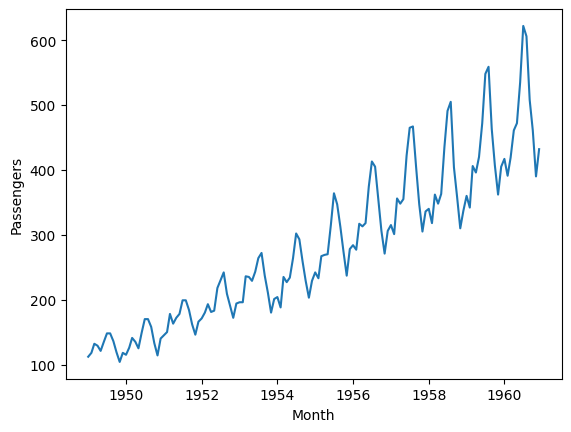

In [77]:
import seaborn as sns
sns.lineplot(df["Passengers"])

Trend is increasing constantly with multiplicative seasonality

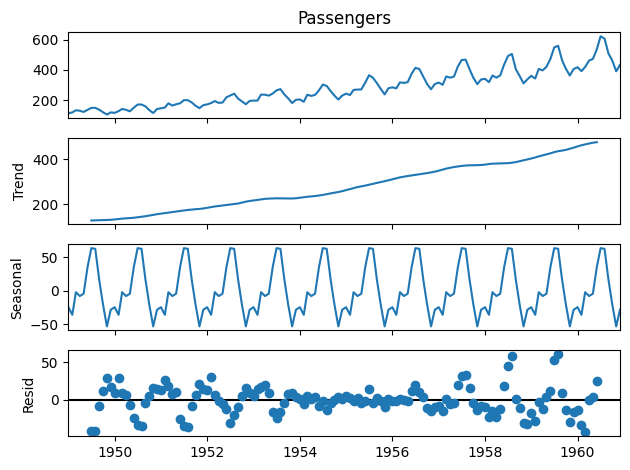

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Passengers"],model="additive")
result.plot()
plt.show()

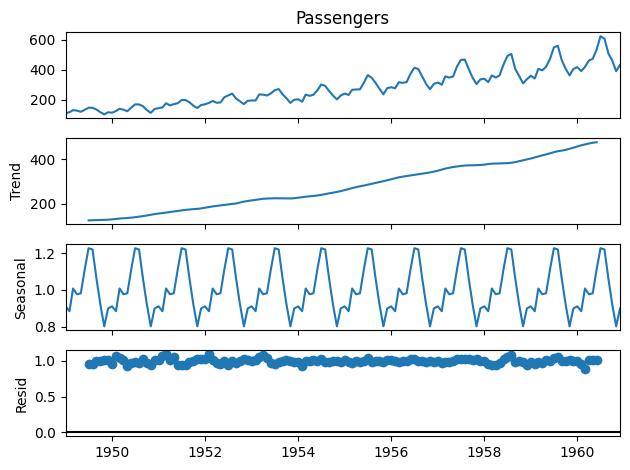

In [79]:
result = seasonal_decompose(df["Passengers"],model="multiplicative")
result.plot()
plt.show()

additive models includes residuals which are scattered near zero whereas in multiplicative model residuals shows dependence 

# lets check whether the time series is stationary or not 

In [80]:
# Adfuller test

adf = adfuller(df["Passengers"])
adf[1]

0.9918802434376409

p-value comes out to be greater then 0.05 means we fail to reject null hypothesis. Thus Series is Non-stationary

In [81]:
# Kpss test 

kpss = kpss(df["Passengers"])
kpss[1]

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_3903/895997843.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = kpss(df["Passengers"])


0.01

p-value comes out to be less then 0.05 means we reject null hypothesis. Thus Series is Non-stationary

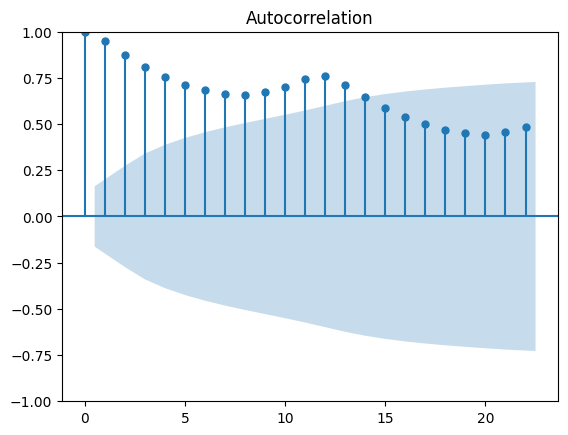

In [82]:
acf = plot_acf(df["Passengers"])
plt.show()

## First Order Differencing

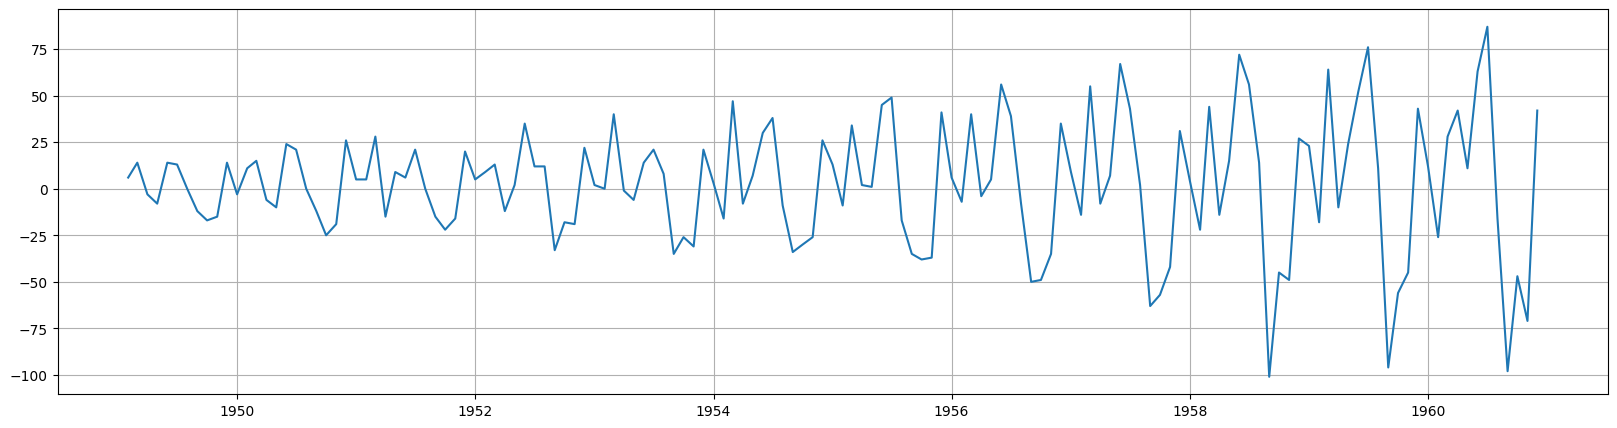

In [83]:
diff = df["Passengers"].diff().dropna() # making time series trend stationary
plt.figure(figsize=(20,5))
plt.plot(diff)
plt.grid()
plt.show()

In [84]:
# Adfuller test

diff_adf = adfuller(diff)
diff_adf[1]

0.05421329028382823

p-value comes out to be greater then 0.05 means we fail to reject null hypothesis. Thus Series is Non-stationary

In [85]:
# Kpss test 
from statsmodels.tsa.stattools import adfuller, kpss
diff_kpss = kpss(diff)
diff_kpss[1]

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_3903/3935559179.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  diff_kpss = kpss(diff)


0.1

p-value comes out to be greater then 0.05 means we fail to reject null hypothesis. Thus Series is stationary

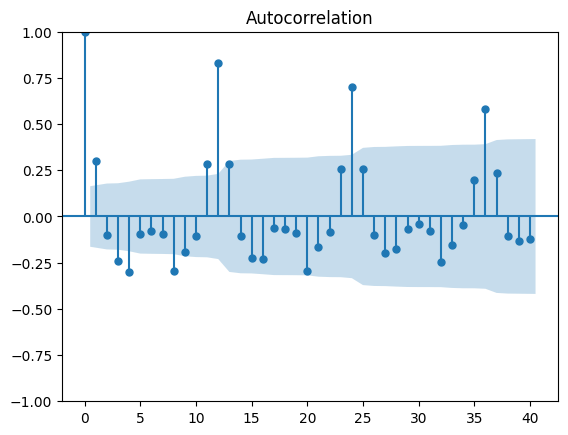

In [129]:
acf = plot_acf(diff, lags = 40)
plt.show()

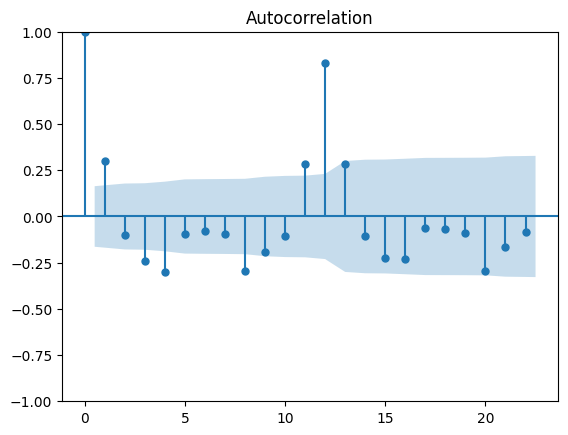

In [130]:
# acf plot
pacf = plot_acf(diff)
plt.show()

# Second Order Differencing

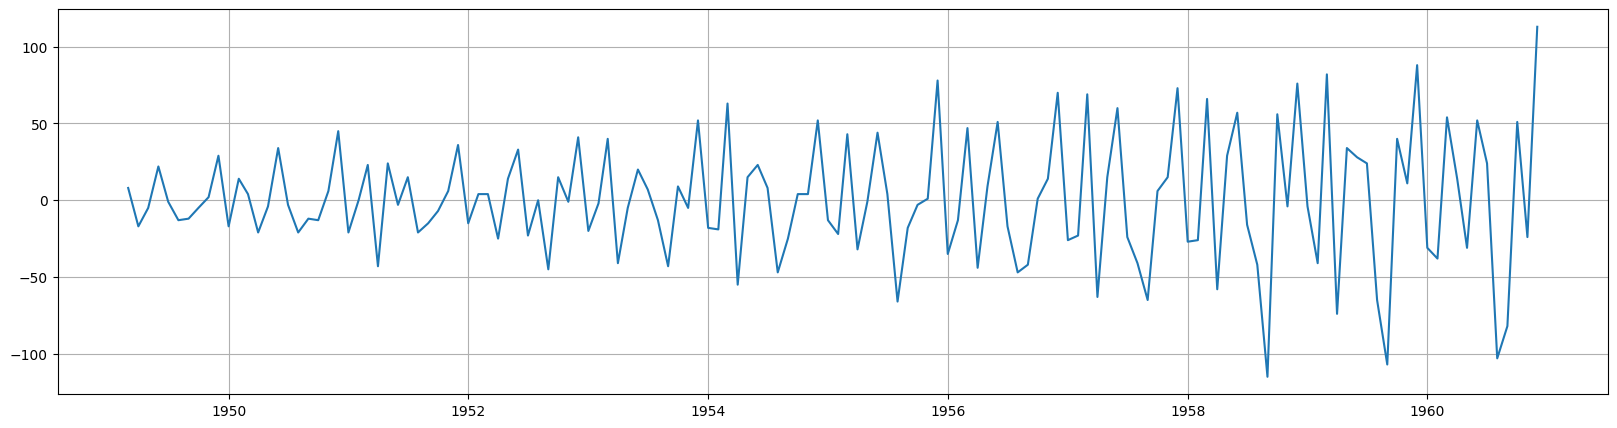

In [87]:
diff2 = df["Passengers"].diff().diff().dropna() # making time series trend stationary
plt.figure(figsize=(20,5))
plt.plot(diff2)
plt.grid()
plt.show()

In [88]:
# Adfuller test

diff2_adf = adfuller(diff2)
diff2_adf[1]

2.732891850013926e-29

p-value comes out to be less then 0.05 means we reject null hypothesis. Thus Series is stationary

In [89]:
# Kpss test 
from statsmodels.tsa.stattools import adfuller, kpss
diff2_kpss = kpss(diff2)
diff2_kpss[1]

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_3903/96100493.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  diff2_kpss = kpss(diff2)


0.1

p-value comes out to be greater then 0.05 means we fail to reject null hypothesis. Thus Series is stationary

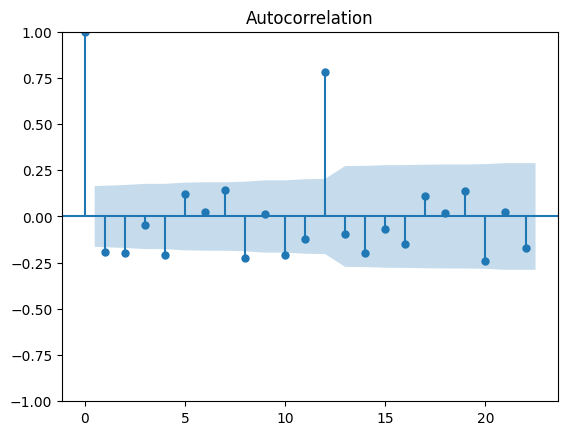

In [90]:
# plotting ACF plot
acf = plot_acf(diff2)
plt.show()

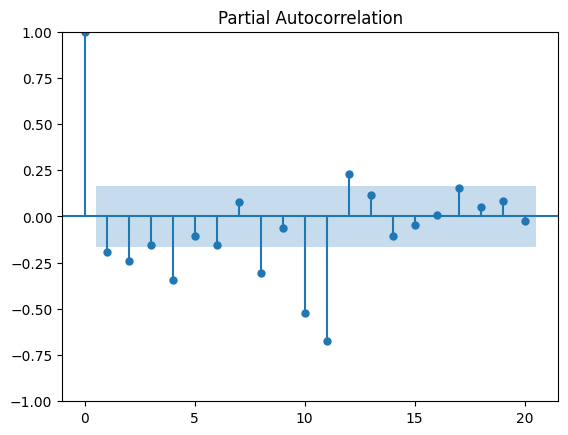

In [91]:
# Plotting PACF plot
plot_pacf(diff2, lags=20)  # Adjust lags if needed
plt.show()

# Forecasting using ARIMA

In [143]:
# Determing the values of p d and q 
p = 2 # since pacf plot cuts of at lag 1 
d = 1 # since we differenced twice
q = 2 # since acf plot cuts of at lag 1

In [144]:
model = ARIMA(df["Passengers"], order=(p,d,q))
model_fit = model.fit()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [145]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Fri, 21 Mar 2025   AIC                           1353.347
Time:                        23:17:38   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.421      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.861      0.000      -2.086      -1.600
ma.L2          0.9953      0.134      7.406      0.000       0.732       1.259
sigma2       665.9695    113.812      5.851      0.000     442.902     889.037
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.59   Prob(JB):                         0.40
Heteroskedasticity (H):               7.38   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [146]:
forecast = model_fit.forecast(steps=24)  # Forecasting next 12 months
print(forecast)

1961-01-01    439.854204
1961-02-01    465.295566
1961-03-01    500.665330
1961-04-01    535.971538
1961-05-01    561.690469
1961-06-01    571.315261
1961-07-01    562.975449
1961-08-01    539.732358
1961-09-01    508.530424
1961-10-01    478.148094
1961-11-01    456.746360
1961-12-01    449.694573
1962-01-01    458.247670
1962-02-01    479.393308
1962-03-01    506.857318
1962-04-01    532.943908
1962-05-01    550.676378
1962-06-01    555.647165
1962-07-01    547.091139
1962-08-01    527.927620
1962-09-01    503.806331
1962-10-01    481.459682
1962-11-01    466.837299
1962-12-01    463.535995
Freq: MS, Name: predicted_mean, dtype: float64


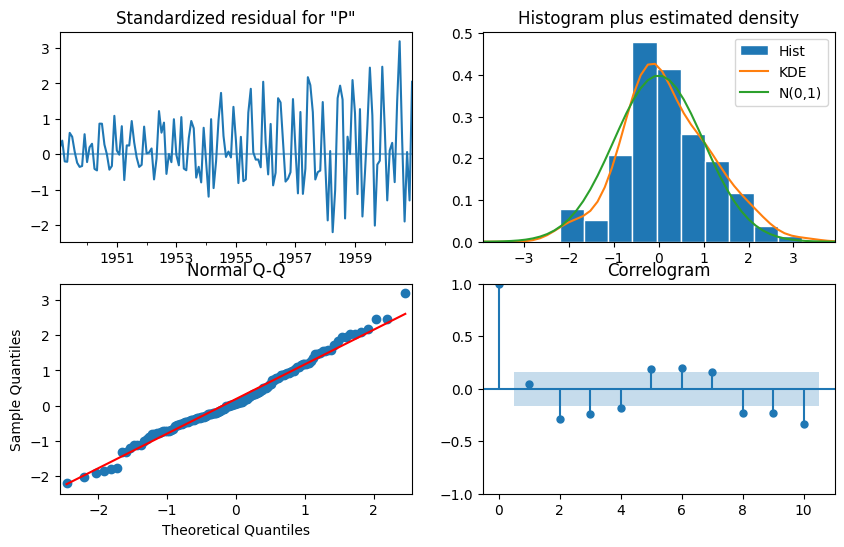

In [147]:
model_fit.plot_diagnostics(figsize=(10,6))
plt.show()

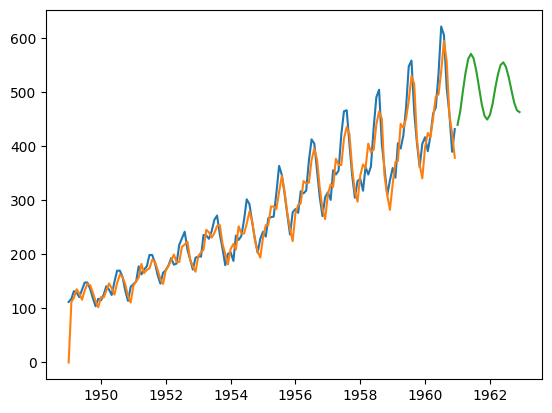

In [148]:
plt.plot(df["Passengers"])
plt.plot(model_fit.fittedvalues)
plt.plot(forecast)

# First order differencing for forecasting SARIMA 

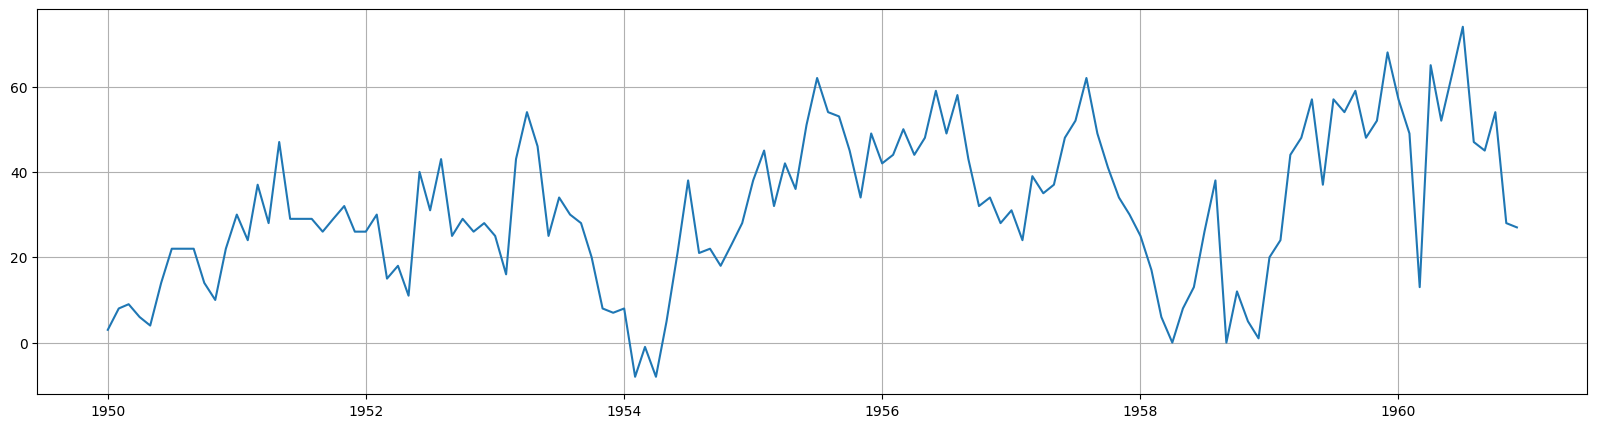

In [149]:
sdiff = df["Passengers"].diff(12).dropna()
plt.figure(figsize=(20,5))
plt.plot(sdiff)
plt.grid()
plt.show()

In [150]:
# Adfuller test

sdiff_adf = adfuller(sdiff)
sdiff_adf[1]

0.011551493085514978

p-value less then 0.05 means reject null hypthesis. Thus Series is Stationary

In [151]:
# kpss test

sdiff_kpss = kpss(sdiff)
sdiff_kpss[1]

0.03409999422360403

value less then 0.05 means reject null hypothesis. Thus series is not stationary

# Second Order Seasonal Differencing

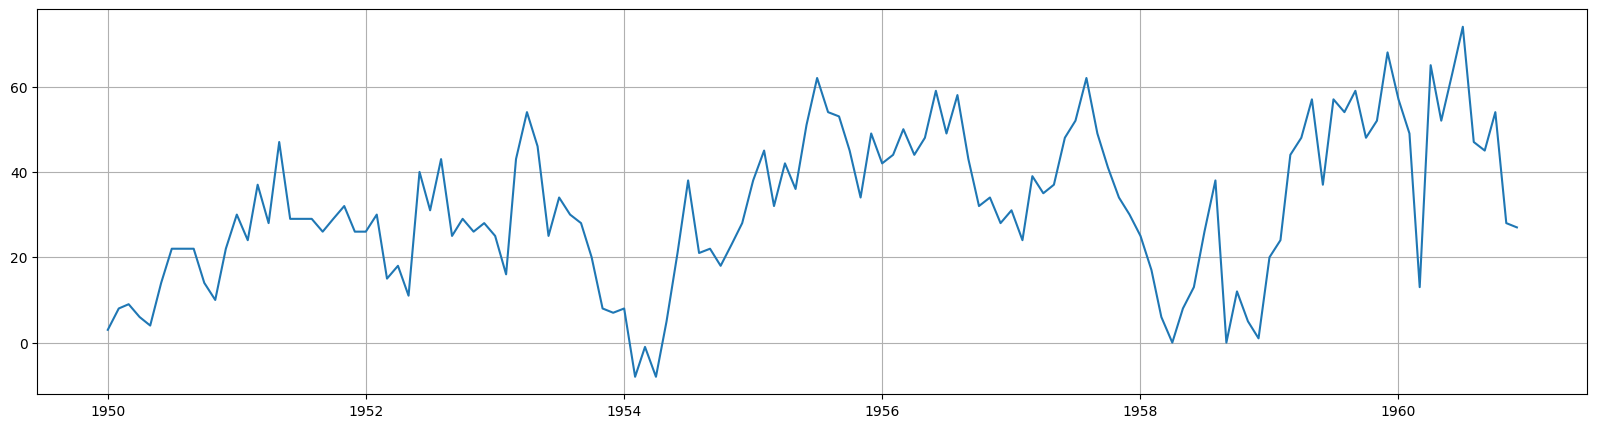

In [152]:
sdiff2 = sdiff.diff(12).dropna()
plt.figure(figsize=(20,5))
plt.plot(sdiff)
plt.grid()
plt.show()

In [153]:
# Adfuller test

sdiff2_adf = adfuller(sdiff2)
sdiff2_adf[1]

0.06339157882390216

p-value less then 0.05 means reject null hypthesis. Thus Series is Stationary

In [154]:
# kpss test

sdiff2_kpss = kpss(sdiff2)
sdiff2_kpss[1]

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_3903/3987951309.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  sdiff2_kpss = kpss(sdiff2)


0.1

value greater then 0.05 means fail to reject null hypothesis. Thus series is stationary

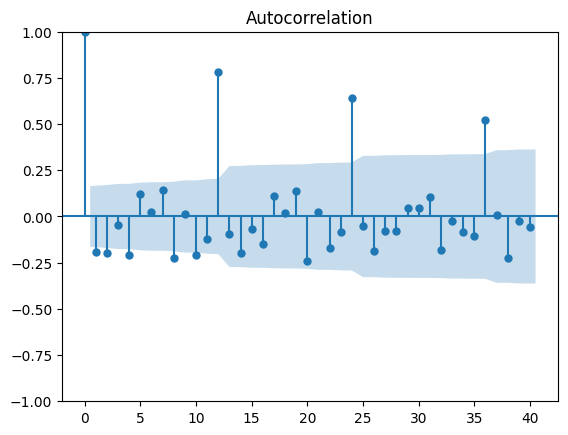

In [157]:
# plotting ACF plot

acf = plot_acf(diff2, lags=40)
plt.show()

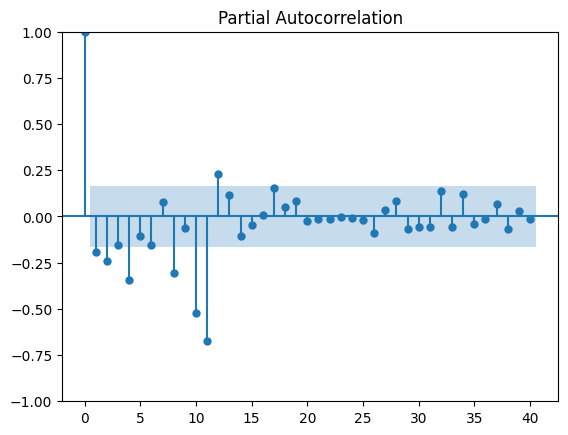

In [158]:
# plotting PACF plot

pacf = plot_pacf(diff2, lags=40)
plt.show()

In [181]:
# P D Q s values for Sarima 
P = 1
D = 2
Q = 1
s = 12

In [182]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA Model with 2nd order seasonal differencing
model = SARIMAX(df['Passengers'], 
                order=(2,1,2),  # p, d, q
                seasonal_order=(P,D,Q,s),  # P, D=2, Q, S=12
                enforce_stationarity=False, 
                enforce_invertibility=False)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [183]:
# Fit the model
result = model.fit()
print(result.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.93270D+00    |proj g|=  6.76345D-02

At iterate    5    f=  2.90259D+00    |proj g|=  2.13541D-02

At iterate   10    f=  2.84023D+00    |proj g|=  7.07559D-02


 This problem is unconstrained.



At iterate   15    f=  2.82535D+00    |proj g|=  5.76320D-03

At iterate   20    f=  2.81939D+00    |proj g|=  2.50134D-02

At iterate   25    f=  2.81755D+00    |proj g|=  4.06825D-03

At iterate   30    f=  2.81753D+00    |proj g|=  1.99933D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     39      1     0     0   1.292D-05   2.818D+00
  F =   2.8175315896001987     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:           

In [184]:
Forecast = result.predict(12)

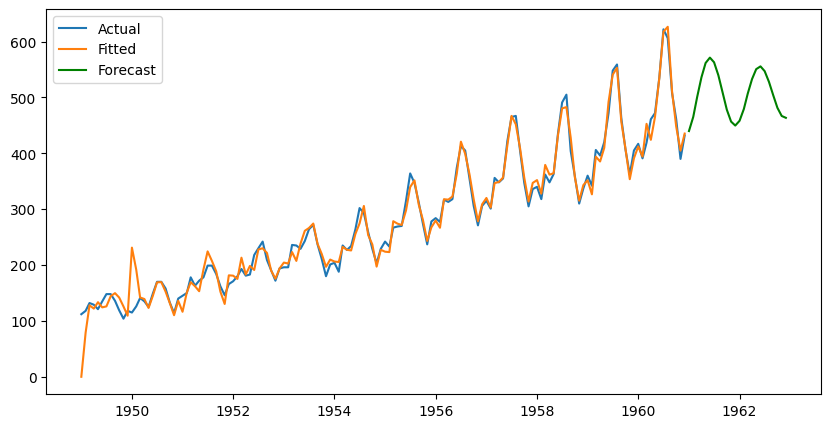

In [185]:
plt.figure(figsize=(10,5))
plt.plot(df["Passengers"], label="Actual")
plt.plot(result.fittedvalues, label="Fitted")
plt.plot(forecast, label="Forecast", color='green')
plt.legend()
plt.show()